In [29]:
from Polygon import Vertex, Polygon, initialize_a_polygon
from Fiber import Edge,Fiber,initialize_a_fiber
from FIREminimization import calculateForceVelocityProjections, FIREminimize
from Overdamped import overdampedDynamics
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def plot_configuration(polygon, fiber = None, filename = "initial.png"):
    fig, ax = plt.subplots(figsize=(10,10))
    vertexColorMap = {"fixed": "red", "linker": "green", "free": "black"}
    for i in range(len(polygon.vertices_)):
        # ax.plot(P.vertices_[i].position_,P.vertices_[i-1].position_,color='black')
        if polygon.vertices_[i].is_fixed_:
            PolygonVertexColor = vertexColorMap["fixed"]
        elif polygon.vertices_[i].is_linked_: 
            PolygonVertexColor = vertexColorMap["linker"]
        else:
            PolygonVertexColor = vertexColorMap["free"]

        ax.plot(polygon.vertices_[i].position_[0],polygon.vertices_[i].position_[1],'o',color = PolygonVertexColor)
        # Only draw the force if it is not if it is not too small
        if np.linalg.norm(polygon.vertices_[i].force_) > 1e-15:
            ForceArrow = FancyArrowPatch(posA = polygon.vertices_[i].position_,
                                    posB = np.add(polygon.vertices_[i].position_,polygon.vertices_[i].force_),
                                    arrowstyle='->,head_width=5,head_length=10',
                                    color='blue', linewidth=2)
            ax.add_patch(ForceArrow)
        EdgeArrow = FancyArrowPatch(posA = polygon.vertices_[i].position_,
                                posB = polygon.vertices_[i-1].position_,
                                arrowstyle='-',
                                color='black', linewidth=2)

        ax.add_patch(EdgeArrow)
    if fiber is None: pass
    else:
        for edge in fiber.edges_:
            fiberEdgeArrow = FancyArrowPatch(posA = edge.vertices_[0].position_,
                                             posB = edge.vertices_[1].position_,
                                             arrowstyle='-',
                                             color='black', linewidth=2)
            
            # add colored nodes:
            for vertex in edge.vertices_:
                if vertex.is_fixed_:
                    FiberNodeColor = vertexColorMap["fixed"]
                elif vertex.is_linked_: 
                    FiberNodeColor = vertexColorMap["linker"]
                else:
                    FiberNodeColor = vertexColorMap["free"]
                ax.plot(vertex.position_[0],vertex.position_[1],'o',color = FiberNodeColor)

        


            ax.add_patch(fiberEdgeArrow)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.savefig(filename)
    plt.close()

    return

In [30]:
polygon = initialize_a_polygon(P0 = 3.8)
fiber = initialize_a_fiber()

plot_configuration(polygon = polygon, fiber = fiber, filename = "initial.png")


In [3]:
for edge in fiber.edges_:
    print(edge.vertices_[0].position_, edge.vertices_[1].position_)

[1.08069748 1.46004102] [2.13198601 1.36060098]
[2.13198601 1.36060098] [3.07648214 1.83361896]


Initial area:  0.912192826512753
Initial perimeter:  3.500541540609078
initial stress:
 [[0.64434222 0.03500954]
 [0.03500954 0.5641187 ]]


AttributeError: 'str' object has no attribute 'edges_'

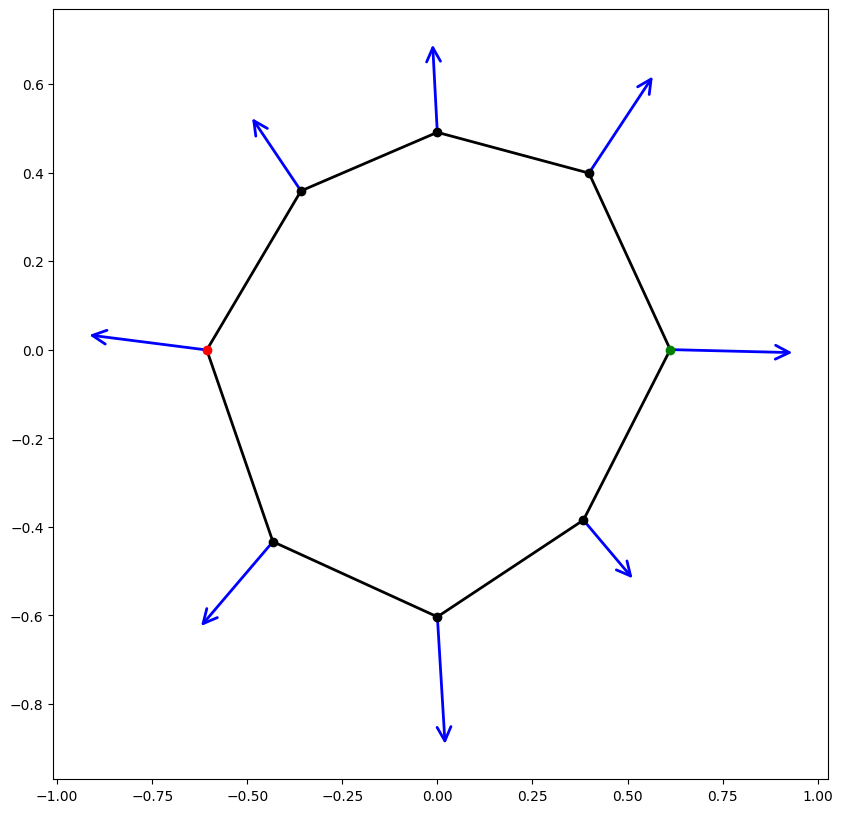

In [31]:
# testing FIRE minimization

P = initialize_a_polygon(P0 = 3.8)


print("Initial area: ", P.area_)
print("Initial perimeter: ", P.perimeter_)
print("initial stress:\n", P.stress_)
plot_configuration(P, "initial.png")
FIREminimize(P)

P.compute_forces()
P.compute_stress()
plot_configuration(P, "final.png")
print("Minimized perimeter ",P.perimeter_)
print("Minimized area ",P.area_)
print("Minimized stress:\n",P.stress_)
print("Forces after minimization:")
for i in range(len(P.vertices_)):
    print(P.vertices_[i].force_)


In [2]:
import os
import glob
for filename in glob.glob("*.png"):
    os.remove(filename)

Initial area:  0.8056827086727046
Initial perimeter:  3.3719729630523356
initial stress:
 [[1.80873076 0.01036747]
 [0.01036747 1.75413458]]
Calculating an overdamped trajectory for the polygon
0 6.829610407580896e-12
1000 6.847449298392779e-06
2000 2.7412434594593712e-05
3000 6.18450577182623e-05
4000 0.00011039629559504191
5000 0.0001734193330234123
6000 0.00025137141612405526
7000 0.00034481623035276704
8000 0.000454426798904411
9000 0.0005809888958018643
10000 0.0007254049660602667
11000 0.0008886985429705846
12000 0.0010720191496828816
13000 0.001276647668811962
14000 0.0015040021596578188
15000 0.001755644097750637
16000 0.0020332850057149937
17000 0.0023387934378202905
18000 0.00267420227296757
19000 0.003041716262182266
20000 0.0034437197668719627
21000 0.003882784613109624
22000 0.00436167797497104
23000 0.004883370186463016
24000 0.0054510423668196915
25000 0.006068093727939332
26000 0.006738148415539097
27000 0.00746506171731485
28000 0.008252925452151985
29000 0.00910607233

KeyboardInterrupt: 

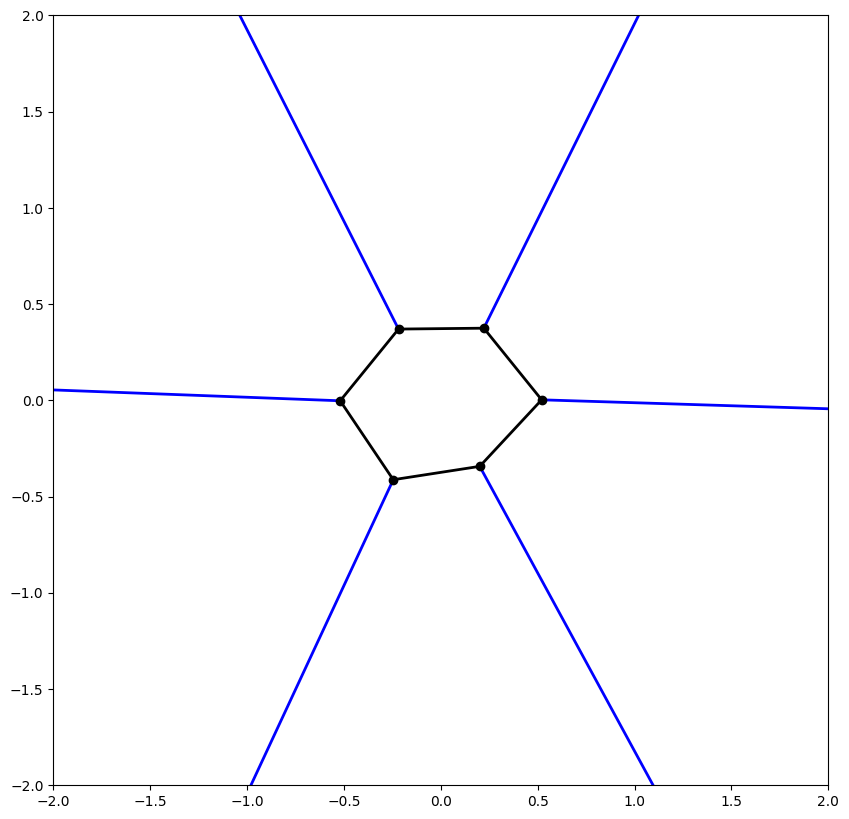

In [2]:
# testing overdamped
P = initialize_a_polygon(P0 = 3.5)


print("Initial area: ", P.area_)
print("Initial perimeter: ", P.perimeter_)
print("initial stress:\n", P.stress_)
plot_configuration(P, "initial.png")
overdampedDynamics(P)

P.compute_forces()
P.compute_stress()
plot_configuration(P, "final.png")
print("Minimized perimeter ",P.perimeter_)
print("Minimized area ",P.area_)
print("Minimized stress:\n",P.stress_)
print("Forces after minimization:")
for i in range(len(P.vertices_)):
    print(P.vertices_[i].force_)
